In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/71/bb/2b2eff995a31a3fa74ebb7dfe93ae5fe1ca05f3ecbd0d55f65e78c1c2b9a/tensorflow-2.16.1-cp39-cp39-macosx_12_0_arm64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/41/f0/7e988a019bc54b2dbd0ad4182ef2d53488bb02e58694cd79d61369e85900/flatbuffers-24.3.25-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast!=0.5.0,!=0.5.

In [6]:
import numpy as np 
import tensorflow as tf 
import matplotlib.pyplot as plt 
import nltk
import utils
from nltk.corpus import twitter_samples

In [7]:
nltk.download('twitter_samples')
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/eshaangupta/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


### Pre-processing Data
- involves removing hyperlinks, old-fashioned 'RT' and hashes
- tokenizing tweet into words
- lower-casing all tokens
- removing stop-words and punctuation
- stemming the words

In [8]:
def process_tweet (tweet):
    trimmed_tweet = utils.trim(tweet)
    tokenized_tweet = utils.tokenize(trimmed_tweet)
    lower_case_tweet = [word.lower() for word in tokenized_tweet]
    clean_tweet = utils.removeStopwordsAndPunctuation(lower_case_tweet)
    stemmed_tweet = utils.stem(clean_tweet)
    return stemmed_tweet

In [9]:
all_tweets = all_positive_tweets + all_negative_tweets

In [11]:
processed_tweets = []
for tweet in all_tweets:
    processed_tweets.append(process_tweet(tweet))

In [13]:
processed_tweets[0]

['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']

### Splitting Data

In [15]:
train_tweets = processed_tweets[:4000] + processed_tweets[5000:9000]
train_labels = [1 if i < 4000 else 0 for i in range(8000)]
val_tweets = processed_tweets[4000:5000] + processed_tweets[9000:]
val_labels = [1 if i < 1000 else 0 for i in range(2000)]

In [16]:
vocab = {'': 0, '[UNK]': 1} 
for tweet in train_tweets:
    for word in tweet:
        if word not in vocab:
            vocab[word] = len(vocab)

In [41]:
def encode (tweets, max_length):
    encodings = []
    for tweet in tweets:
        base = [vocab[word] if word in vocab else 1 for word in tweet]
        encoding = base + [0] * (max_length - len(base))
        encodings.append(encoding)
    return encodings

In [42]:
max_length = max([len(s) for s in train_tweets + val_tweets])
embed_dim = 16
num_words = len(vocab)

(array([4.696e+03, 3.385e+03, 1.647e+03, 2.190e+02, 1.300e+01, 3.800e+01,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1.,  6., 11., 16., 21., 26., 31., 36., 41., 46., 51.]),
 <BarContainer object of 10 artists>)

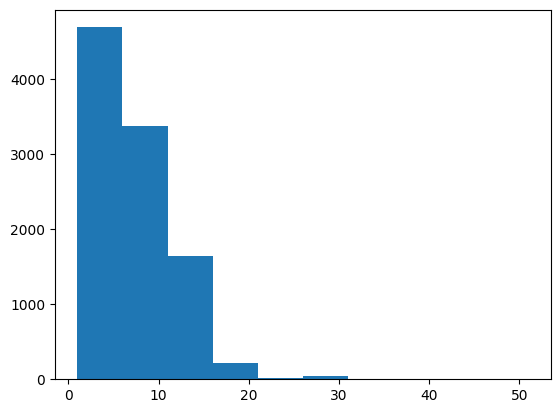

In [43]:
plt.hist([len(s) for s in train_tweets + val_tweets])

In [44]:
train_data = encode(train_tweets, max_length)
val_data = encode(val_tweets, max_length)

In [45]:
X_train = np.array(train_data)
X_val = np.array(val_data)
Y_train = np.array(train_labels)
Y_val = np.array(val_labels)

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(num_words, embed_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [47]:
model.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [48]:
history = model.fit(x=X_train, y=Y_train, validation_data=(X_val, Y_val), batch_size=256, epochs=20)

Epoch 1/20


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5558 - loss: 0.6899 - val_accuracy: 0.9785 - val_loss: 0.6769
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9740 - loss: 0.6715 - val_accuracy: 0.9920 - val_loss: 0.6568
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9952 - loss: 0.6489 - val_accuracy: 0.9960 - val_loss: 0.6313
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9952 - loss: 0.6211 - val_accuracy: 0.9955 - val_loss: 0.6010
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9968 - loss: 0.5877 - val_accuracy: 0.9925 - val_loss: 0.5669
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9941 - loss: 0.5517 - val_accuracy: 0.9960 - val_loss: 0.5295
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9920 - loss: 0.5136 - val_accuracy: 0.9960 - val_loss: 0.4908
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9908 - loss: 0.4741 - val_accuracy: 0.9955 - val_loss: 0.4519
Epo

In [56]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

<Figure size 1000x1000 with 0 Axes>

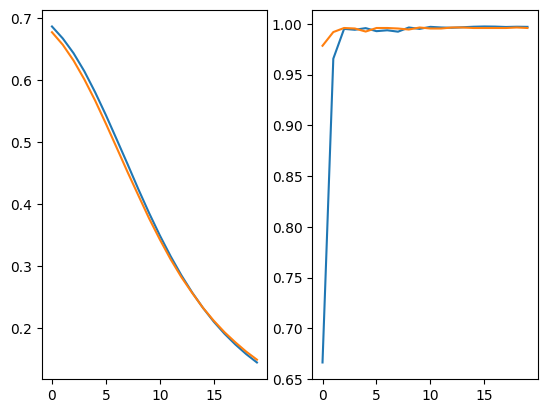

In [79]:
plt.figure(figsize=(10, 10))
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].plot([i for i in range(20)], history.history['loss'], label='loss')
ax[0].plot([i for i in range(20)], history.history['val_loss'], label='val_loss')
ax[1].plot([i for i in range(20)],history.history['accuracy'], label='accuracy')
ax[1].plot([i for i in range(20)],history.history['val_accuracy'], label='val_accuracy')
plt.show()